In [1]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [2]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [3]:
feature_vec_36 = TN_utils.load_featureImg_r(1)
feature_vec_12 = TN_utils.load_featureImg_r(12)
print feature_vec_36.shape

(65536, 60, 2)


In [4]:
with gzip.open("../data/toytreerot_imgGT.npy.gz", "r") as f:
    GT_vec_array = np.load(f)
GT_vec_36 = GT_vec_array[0]
GT_vec_12 = GT_vec_array[11]

In [5]:
with gzip.open("../data/toytreerot_mask.npy.gz", "r") as f:
    mask_vec_array = np.load(f)
mask_vec_36 = mask_vec_array[0]
mask_vec_12 = mask_vec_array[11]

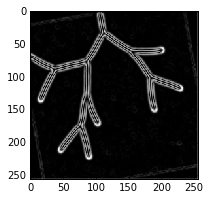

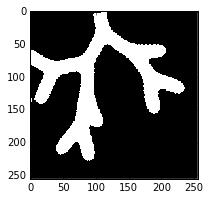

In [6]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_36, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_36, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_36.reshape((256, 256)))

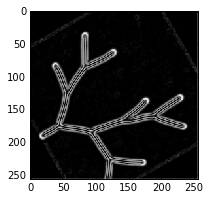

In [7]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_12, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_12, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_12.reshape((256, 256)))

In [8]:
m_feature_vec36 = feature_vec_36[mask_vec_36][:, 12:24]
m_GT_vec36 = GT_vec_36[mask_vec_36]
print m_feature_vec36.shape, m_GT_vec36.shape

(13857, 12, 2) (13857, 2)


In [9]:
m_feature_vec12 = feature_vec_12[mask_vec_12][:, 12:24]
m_GT_vec12 = GT_vec_12[mask_vec_12]
print m_feature_vec12.shape, m_GT_vec12.shape

(13597, 12, 2) (13597, 2)


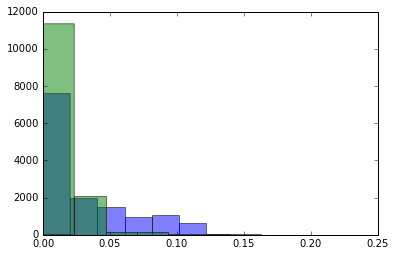

In [10]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [11]:
normed_m_feature_vec36, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec36)

In [12]:
normed_m_feature_vec12, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec12)

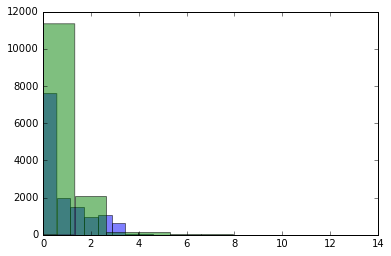

In [13]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [14]:
import TNN
reload(TNN)

Couldn't import dot_parser, loading of dot files will not be possible.


<module 'TNN' from 'TNN.pyc'>

In [15]:
n_hidden = 10
result = TNN.ab(normed_m_feature_vec36, m_GT_vec36,
                normed_m_feature_vec12, m_GT_vec12,
                n_hidden=n_hidden, h_activation="ReLU", out_activation="ReLU")

In [16]:
f_train, f_training_error, f_test_error, f_output, s_input, s_target, param2_list, a_list, b_list, bias_list = result

In [20]:
n_tensor = 12
param2_list[0].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[1].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[2].set_value(0.)
for i in range(n_hidden):
    a_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    b_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    bias_list[i].set_value(0.)

In [21]:
lr = 0.5 
reg2 = 0.
batch_size = 100
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 200
interval = 10
training_error_array = np.zeros((n_epochs // interval,))
test_error_array = np.zeros((n_epochs // interval,))

In [22]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)
    
    if i_epoch == 50:
        batch_size = 1000

    if i_epoch % interval == 0:
        training_error = f_training_error()[0]
        training_error_array[i_epoch // interval] = training_error
        test_error = f_test_error()[0]
        test_error_array[i_epoch // interval] = test_error
        print i_epoch, training_error, test_error

0 0.00866485292868 0.00860778601331
10 0.00740861069084 0.00734593826349
20 0.00605950134141 0.00598918428817
30 0.00446343923804 0.0043795820305
40 0.00375511644075 0.00365599336517
50 0.00379639259144 0.00368644285168
60 0.00362025778604 0.0035118877577
70 0.00355329985215 0.00344608737215
80 0.00352293584054 0.00341655285774
90 0.0035071554261 0.00340162283558
100 0.00349833157371 0.00339357340402
110 0.00349314947655 0.00338903400175
120 0.00349002241076 0.00338650011998
130 0.0034882128361 0.00338524171117
140 0.00348729551363 0.00338483866845
150 0.00348699157703 0.00338502350717
160 0.0034872026112 0.00338570148241
170 0.0034878027591 0.00338668365893
180 0.00348869363392 0.00338792680659
190 0.00348982470554 0.00338939855103


In [27]:
# V
plt.plot(training_error_array)
plt.plot(test_error_array)

In [23]:
import os
if not os.path.isdir("../results/toytree12"):
    os.makedirs("../results/toytree12")

with open("../results/toytree12/training_error_array.npy", "w") as f:
    np.save(f, training_error_array)
with open("../results/toytree12/test_error_array.npy", "w") as f:
    np.save(f, test_error_array)
gt2_vec = f_output(feature_vec_36[:, 12:24]/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape=(256, 256))
sio.savemat('../results/toytree12/v_train.mat', {'v_train': gt1_img})

feature_vec_12 = TN_utils.load_featureImg_r(12)[:, 12:24]
gt2_vec_12 = f_output(feature_vec_12/norm_coef[:, np.newaxis])[0]
gt1_img_12 = TN_utils.convert_gt2vec_to_gt1img(gt2_vec_12, img_shape=(256, 256))
sio.savemat('../results/toytree12/v_test.mat', {'v_test': gt1_img_12})

In [24]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img_12, axis=0).T)

In [23]:
# V
gomi = plt.hist(np.linalg.norm(gt1_img, axis=0).flatten())